## Assignment 1b: Time Series Forecasting

### Md Tauhidul Islam a1895813


### 1. Read the dataset

In [1]:
import pandas as pd
df = pd.read_csv("energydata_complete.csv")

'''Handling Time Series Data: setting the 'date' column as index for time series analysis. 
This is a part of data pre-processing''' 

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-11-01 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-11-01 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-11-01 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
2016-11-01 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### 2. Analyse and visualise the data

Since our target variable is 'Appliances' (as per our analysis in assignment 1a), at first we will take a look at the appliance's energy consumtion throughout the year.

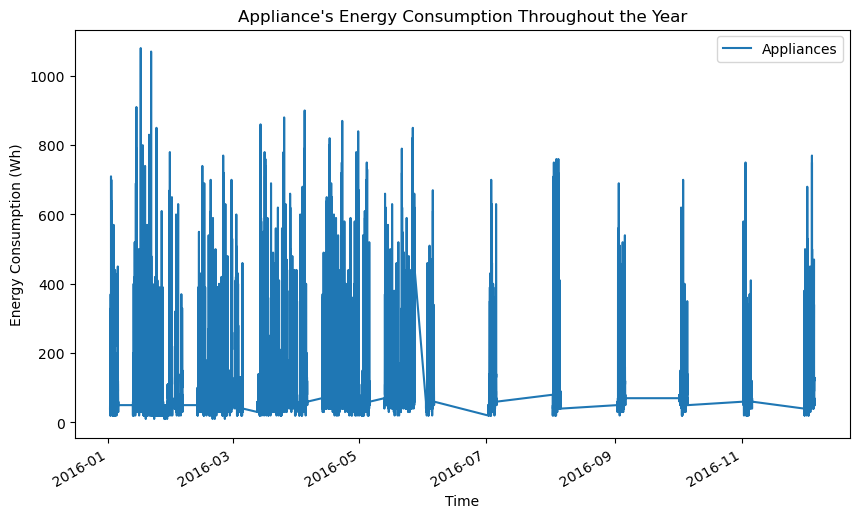

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['Appliances'].plot()
plt.title('Appliance\'s Energy Consumption Throughout the Year')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.show()

The current data we have is showing us energy consumption in every 10-minutes interval throughout the year. Let's aggregate to daily energy consumption for a clear understanding.  It may improve the quality of the analysis by helping us by detecting underlaying patterns, seasonality and trends properly.

In [3]:
daily_data = df.resample(rule='D').sum() # Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
daily_data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-02,22450,2180,3230.798333,6701.261667,3119.477500,6476.752500,3285.391667,6649.018333,2837.117500,7071.495833,...,2546.029167,7327.230000,1578.30,109320.65,12374.5,1196.5,5731.0,1241.7000,3411.478224,3411.478224
2016-01-03,10420,720,2976.439167,5359.471667,2689.476667,5483.430000,2977.299167,5212.458333,2850.510833,5122.170000,...,2600.296667,5503.237500,353.15,109090.30,13499.0,806.0,6326.5,218.0500,3522.087531,3522.087531
2016-01-04,8580,10,3144.370833,5580.122500,2933.866667,5735.228333,3209.915833,5472.807500,2951.506667,5525.965833,...,2918.153333,5852.862500,1028.77,109389.55,11462.5,292.5,6207.5,508.2000,3436.322390,3436.322390
2016-01-05,14090,30,3101.980000,5350.316667,2949.577500,5313.382500,3269.330000,5109.732500,2939.118333,5178.709333,...,2796.946667,5595.021667,1146.90,110200.55,9971.5,495.5,5808.0,270.3503,3412.602365,3412.602365
2016-01-06,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.0000,0.000000,0.000000


In [4]:
# Let's see the date index to ensure we are doing it correctly.
daily_data.index

DatetimeIndex(['2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
               '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09',
               '2016-01-10', '2016-01-11',
               ...
               '2016-11-26', '2016-11-27', '2016-11-28', '2016-11-29',
               '2016-11-30', '2016-12-01', '2016-12-02', '2016-12-03',
               '2016-12-04', '2016-12-05'],
              dtype='datetime64[ns]', name='date', length=339, freq='D')

Now, let's see how the daily energy consumtion looks like.

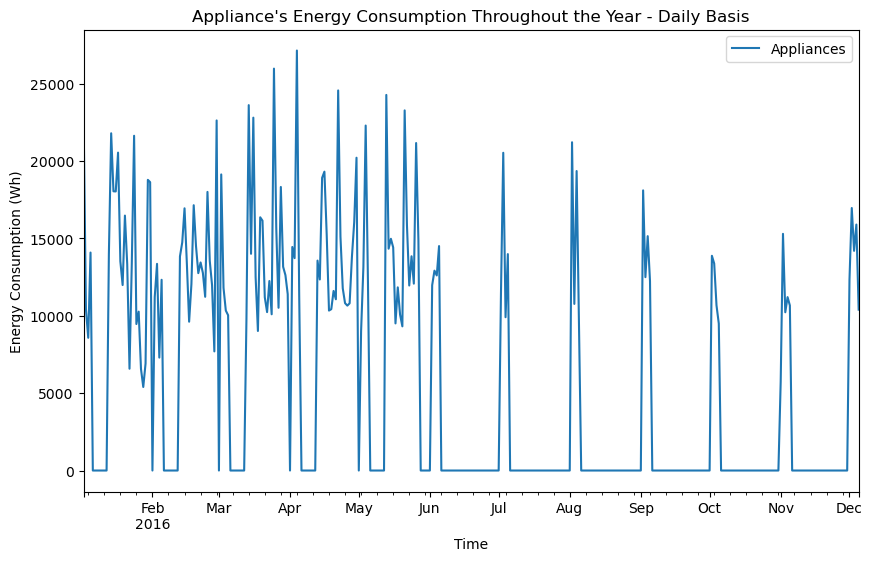

In [5]:
plt.figure(figsize=(10, 6))
daily_data['Appliances'].plot()
plt.title('Appliance\'s Energy Consumption Throughout the Year - Daily Basis')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.show()

#### Trend Analysis with Moving Average

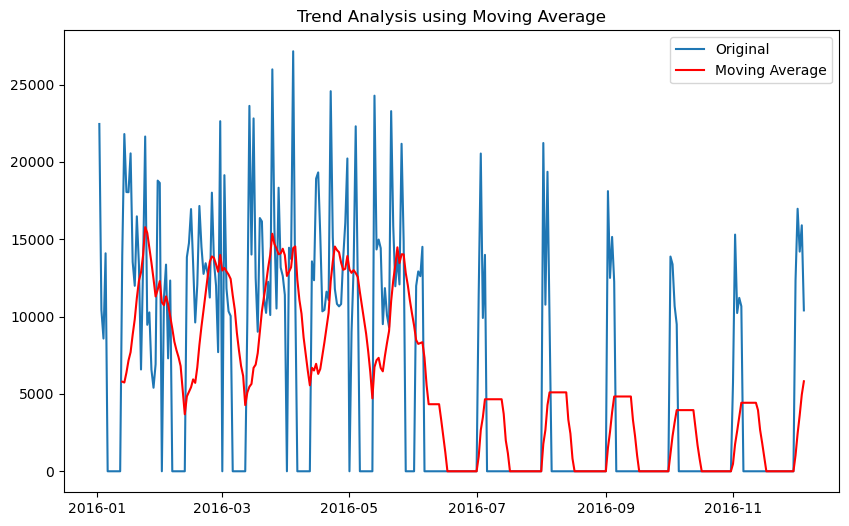

In [6]:
# Calculating the moving average
window_size = 12
daily_data['Moving_Avg'] = daily_data['Appliances'].rolling(window=window_size).mean() # Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

# Ploting original data and moving average to show the trend
plt.figure(figsize=(10, 6))
plt.plot(daily_data['Appliances'], label='Original')
plt.plot(daily_data['Moving_Avg'], color='red', label='Moving Average')
plt.title('Trend Analysis using Moving Average')
plt.legend()
plt.show()

#### Key Findings:
* Overall Trend: From the above plot, we can visualise the long-term trend. It seems that the energy consumption is relatively constant over the years. There is no strong upward or downward trend in the data which indicate stable average energy consumption habits.
* Seasonal Fluctuations: The data shows regular spikes, which indicates seasonal fluctuations.
* Potential Outliers: Some particularly high spikes can be seen in our data. These could represent outliers, we'll to further analysis.

Let's do seasonal decomposition of the daily energy consumption for further visualisation.

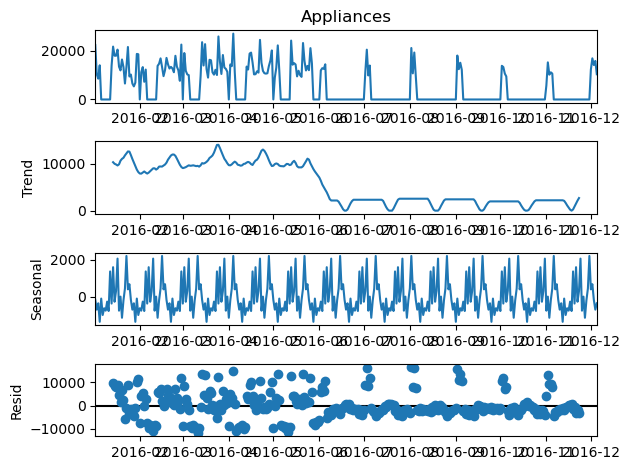

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose # Reference: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

'''Performing seasonal decomposition using an additive model (as seasonal variation is roughly 
constant throughout the series) for daily data'''

decomposition_daily = seasonal_decompose(daily_data['Appliances'], model='additive', period=24)
# Ploting the decomposed components
fig = decomposition_daily.plot()
plt.show()

#### Key Findings:
* Original (Top Panel - Appliances): This is the appliances actual energy consumption that shows significant spikes.

* Trend (Second Panel): The energy consumption trend appears to be relatively flat with occasional spikes. The spikes might  represent unusual increases or decreases in energy use. We'll remove the trend for ARIMA model in order to make data stationary.

* Seasonality (Third Panel): The repeating spikes in the seasonal component indicate a strong seasonal pattern within the data. Therefore, we need to remove seasonality to implement ARIMA model.

* Residuals (Bottom Panel): We can see the residuals in the bottom panel which refers to anomalies or noise. 


Let's analysis the magnitude of the above components. 

* We can see the trend is large enough than the seasonal component which confirms the validity of the data.

* The seasonal component is large enough (approx. 2000) to say that there is seasonality in the data.

* The residual component is randomly distributed and a lot of them have large value. We will consider these as outliers and remove from the dataset for better output.

In order to visualise the outliers, let's aggregate to weekly energy consumption.

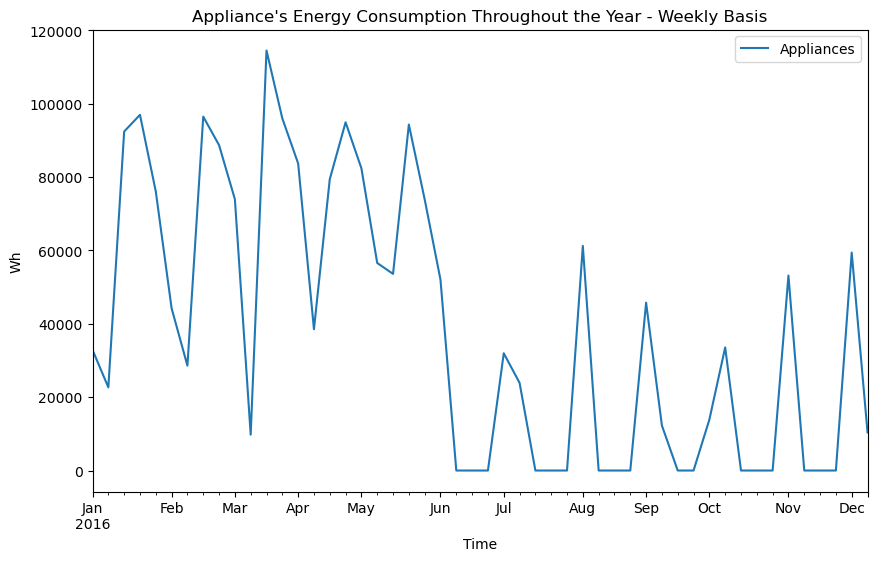

In [8]:
weekly_data = df.resample(rule='W').sum() # Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
plt.figure(figsize=(10, 6))
weekly_data['Appliances'].plot()
plt.title('Appliance\'s Energy Consumption Throughout the Year - Weekly Basis')
plt.xlabel('Time')
plt.ylabel('Wh')
plt.legend()
plt.show()

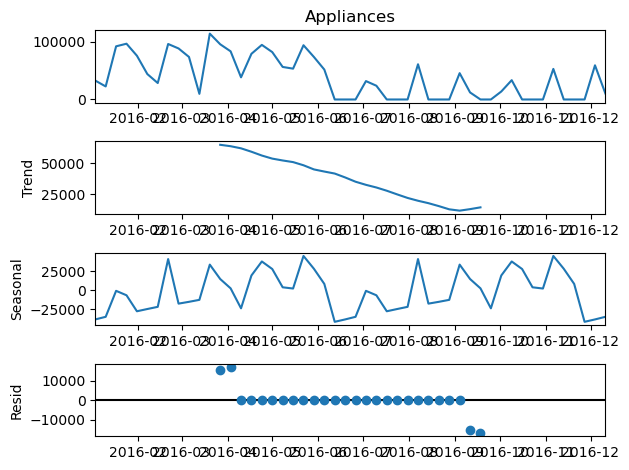

In [9]:
# Performing seasonal decomposition using an additive model for weekly daya
decomposition_weekly = seasonal_decompose(weekly_data['Appliances'], model='additive', period=24) # Reference: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
# Ploting the decomposed components
fig = decomposition_weekly.plot()
plt.show()

Now, we can clearly see extremely large outliers in the residual component. Let's alo see the boxplot of the original data for more clear visualisation.

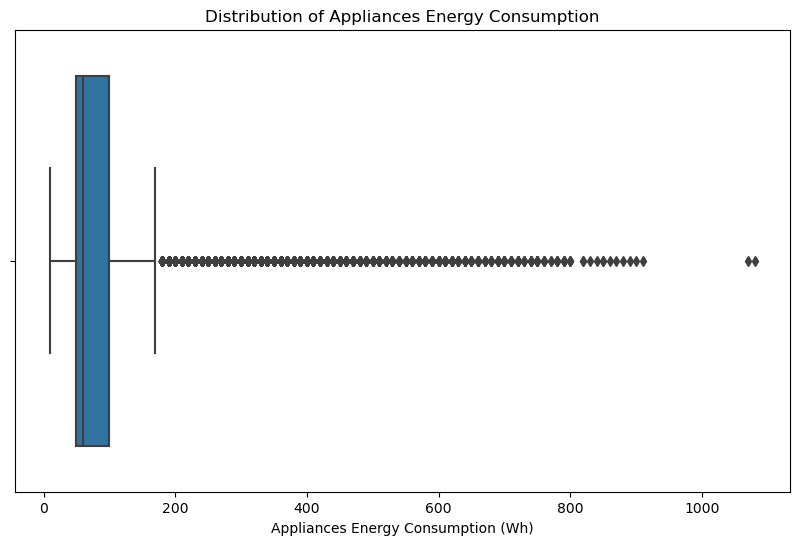

In [10]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x="Appliances", data=df)
plt.xlabel('Appliances Energy Consumption (Wh)')
plt.title("Distribution of Appliances Energy Consumption")
plt.show()

From the above analysis, it is absouletly clear that, we have significant outliers.

### 3. Pre-process the data

* First of all, let's check for missing values and impute missing values if needed.
* Feature Selection: We will consider the same features from assignment 1a.
* Handling Time Series Data: The date-time index is significant for time series analysis. Hence, I have esnured that it is in correct format. (This was done at the very first place)
* We will scale the data using MinMaxScaler.
* We'll remove seasonality and trends for ARIMA model.
* Finally we'll We'll remove outliers.

We will proceed with the original dataset instead of daily or weekly data for model implementation. The reason for selecting the original dataset is to maintain the same scale of mean squared error (MSE) as assignment 1a so that we can compare the models.

In [11]:
# Checking Missing values:
missing_values = df.isnull().sum()

# Feature Selection:
X =  df.drop(['Appliances', 'rv1', 'rv2', 'lights'], axis=1)  # Selected Features as per assignment 1a
y = df['Appliances']  # Target

# # Scaling Data: Standardising the dataset. Here, we'll use MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler # used for more stable and quicker convergence  
from sklearn.model_selection import train_test_split

'''Doing train-test split before scaling to ensure the model is not exposed to 
information from the test set during training.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

scaler = MinMaxScaler(feature_range = (0, 1))
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reference: Assignment 1a

#### Removing Seasonality and Trend:

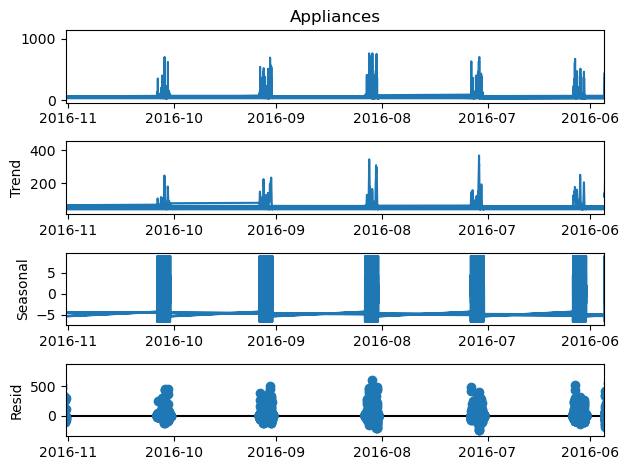

In [12]:
# Performing seasonal decomposition using an additive model for the original data
decomposition_df = seasonal_decompose(df['Appliances'], model='additive', period=24) # Reference: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
# Ploting the decomposed components
fig = decomposition_df.plot()
plt.show()

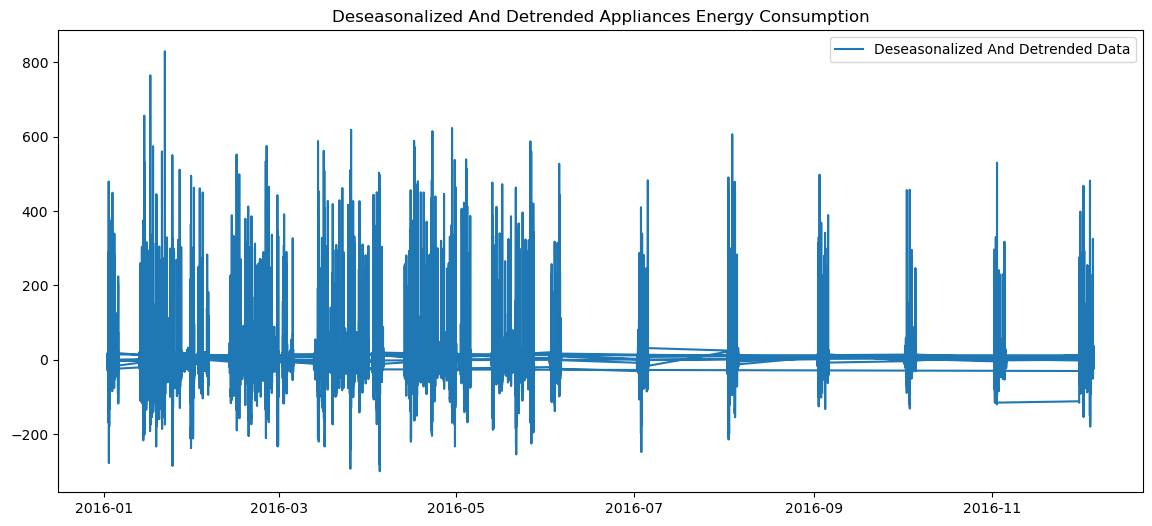

In [13]:
df['Detrended_Deseasonalized'] = df['Appliances'] - (decomposition_df.trend + decomposition_df.seasonal) 
# Reference: Lecure 5 slide (TS1 = TS – Trend) 

plt.figure(figsize=(14, 6))
plt.plot(df['Detrended_Deseasonalized'], label='Deseasonalized And Detrended Data')
plt.title('Deseasonalized And Detrended Appliances Energy Consumption')
plt.legend()
plt.show()

In [14]:
missing_values = df['Detrended_Deseasonalized'].isnull().sum()
print(missing_values)

24


We have 24 missing values after seasonality removal. We will not be able to detect it in the plot. However, this missing values may cause irregular sampling. Let's drop missing value to make it uniform.


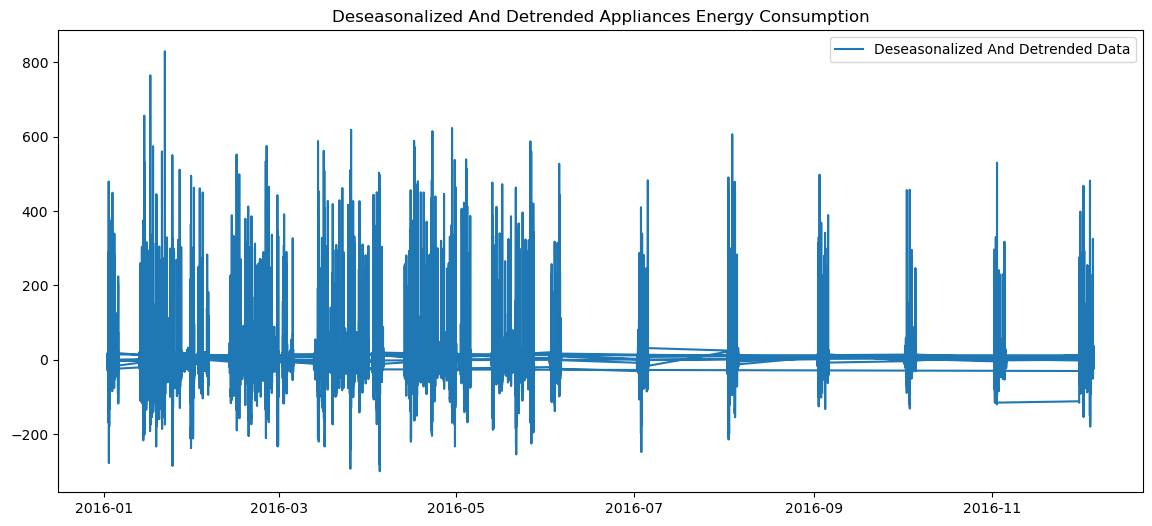

In [15]:
df.dropna(inplace=True) 
plt.figure(figsize=(14, 6))
plt.plot(df['Detrended_Deseasonalized'], label='Deseasonalized And Detrended Data')
plt.title('Deseasonalized And Detrended Appliances Energy Consumption')
plt.legend()
plt.show()

In [16]:
detrended_deseasonalized_df = df[['Detrended_Deseasonalized']]
detrended_deseasonalized_df.head(10)

,Detrended_Deseasonalized
date,
2016-11-01 19:00:00,295.797110
2016-11-01 19:10:00,114.920184
2016-11-01 19:20:00,-30.981073
2016-11-01 19:30:00,-34.181347
2016-11-01 19:40:00,-48.130303
2016-11-01 19:50:00,-69.248511
2016-11-01 20:00:00,-60.181702
2016-11-01 20:10:00,-10.837874
2016-11-01 20:20:00,-47.936940


#### Removing Outliers:

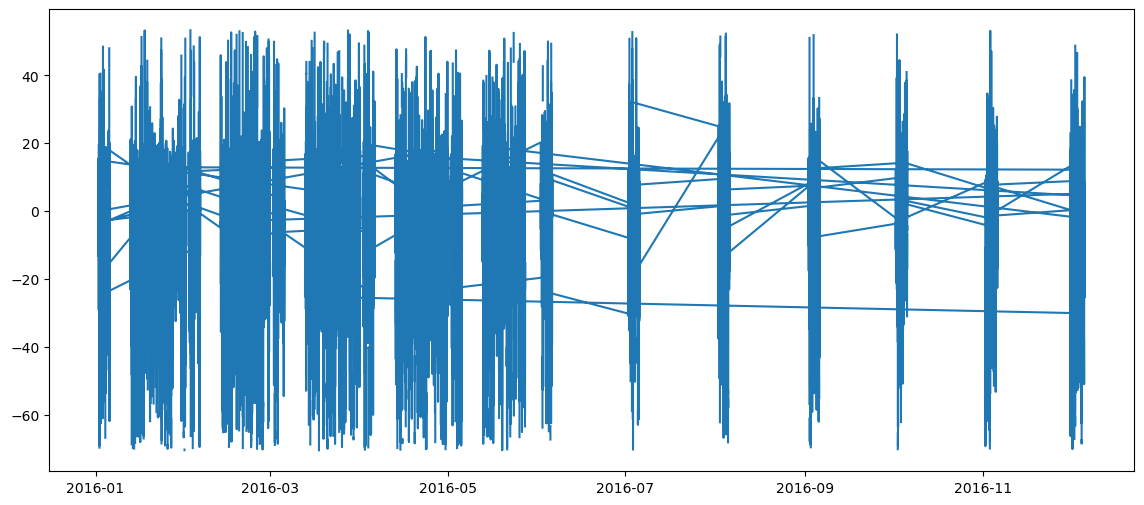

In [17]:
# Calculating Q1, Q3, and the IQR 
Q1 = detrended_deseasonalized_df.quantile(0.25) # Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
Q3 = detrended_deseasonalized_df.quantile(0.75)
IQR = Q3 - Q1

lower_data_point = Q1 - 1.5 * IQR
upper_data_point = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = detrended_deseasonalized_df[(detrended_deseasonalized_df >= lower_data_point) & 
                                          (detrended_deseasonalized_df <= upper_data_point)]

plt.figure(figsize=(14, 6))
plt.plot(df_filtered)
plt.show()

In [18]:
missing_values = df_filtered.isnull().sum()
print(missing_values)

Detrended_Deseasonalized    3061
dtype: int64


We have a large number of missing values after outliers removal. We still cannot see the irregularity in the plot because of the large scale of the dataframe. Let's change the scale to `daily_data` and run the same process to visualise the significant irregularities in our data. (visualisation purpose only)

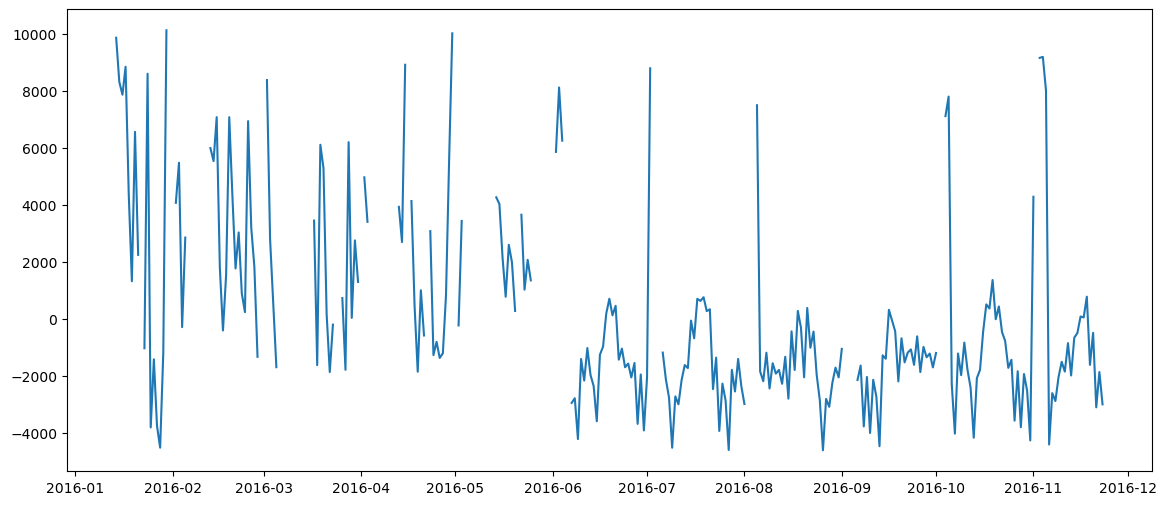

In [19]:
daily_data['Detrended_Deseasonalized'] = (daily_data['Appliances'] - (decomposition_daily.trend + decomposition_daily.seasonal))

detrended_deseasonalized_daily_df = daily_data[['Detrended_Deseasonalized']]
detrended_deseasonalized_daily_df.head(10)

# Calculating Q1, Q3, and the IQR
Q1_daily = detrended_deseasonalized_daily_df.quantile(0.25)
Q3_daily = detrended_deseasonalized_daily_df.quantile(0.75)
IQR_daily = Q3_daily - Q1_daily

lower_data_point_daily = Q3_daily - 1.5 * IQR_daily
upper_data_point_daily = Q3_daily + 1.5 * IQR_daily

# Filter the DataFrame to remove outliers
df_filtered_daily = detrended_deseasonalized_daily_df[(detrended_deseasonalized_daily_df>= lower_data_point_daily) & 
                                          (detrended_deseasonalized_daily_df<= upper_data_point_daily)]

plt.figure(figsize=(14, 6))
plt.plot(df_filtered_daily)
plt.show()


As predicted, we can see the irregularities clearly. In order implement our models we need a uniform data. Therefore, We'll drop the missing values to make it uniform.


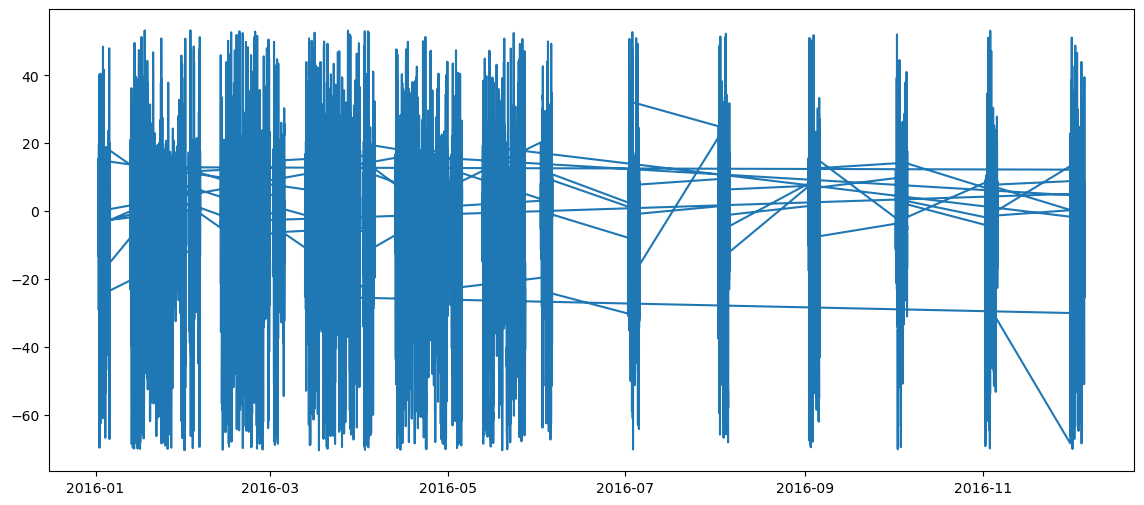

In [20]:
df_filtered.dropna(inplace=True)

plt.figure(figsize=(14, 6))
plt.plot(df_filtered)
plt.show()

### 4. Implement, train and test prediction models

#### ARIMA Model Implementation

In [21]:
# Step 1: Stationarity Check # Reference: Lecuture slide
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_filtered)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -21.363474
p-value: 0.000000


#### Findings: The p-value is less than 0.05. Therefore the series is stationary.

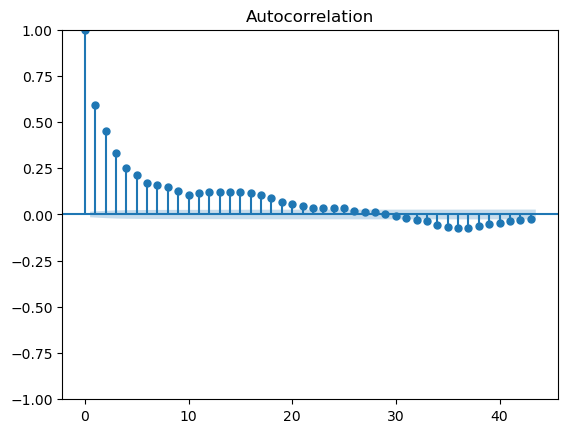

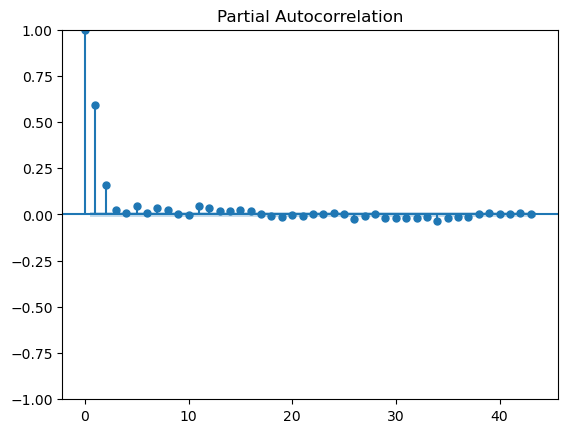

In [22]:
import warnings
warnings.filterwarnings('ignore')

# Step 2: Determine ARIMA Parameters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

# Reference: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
# Reference: https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html

plot_acf(df_filtered)
plot_pacf(df_filtered)
plt.show()

* ACF Plot for q parameter: Moving Average order.
* PACF Plot for p parameter: Autoregressive order

                                  SARIMAX Results                                   
Dep. Variable:     Detrended_Deseasonalized   No. Observations:                16650
Model:                       ARIMA(2, 0, 1)   Log Likelihood              -70709.474
Date:                      Sun, 17 Mar 2024   AIC                         141428.947
Time:                              02:46:45   BIC                         141467.548
Sample:                                   0   HQIC                        141441.689
                                    - 16650                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9123      0.430    -20.738      0.000      -9.755      -8.070
ar.L1          0.7067      0.031     22.801      0.000       0.646       0.767
ar.L

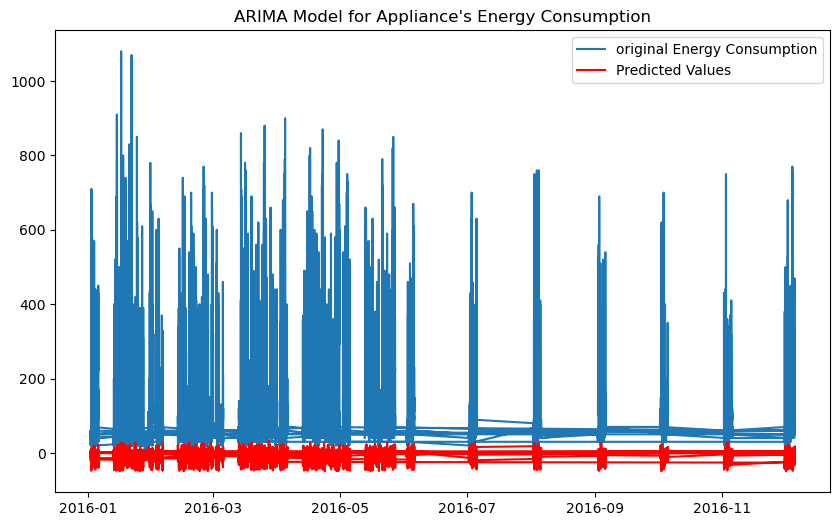

In [23]:
# Step 3: Fit the ARIMA Model # Reference: Workshop
from statsmodels.tsa.arima.model import ARIMA

order=(2,0,1) 
# p = 2 ( we can see 2 significant lags in PACF)
# d = 0 (as differencing is not needed to make the series stationary)
# q = 1 (1 significant lag in ACF) 

arima_model = ARIMA(df_filtered, order=order)
arima_result = arima_model.fit()

# Summary of the model
print(arima_result.summary())

# Plot the original energy consumption and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['Appliances'], label="original Energy Consumption")
plt.plot(arima_result.predict(), color='red', label="Predicted Values")
plt.title("ARIMA Model for Appliance's Energy Consumption")
plt.legend()
plt.show()

In [24]:
# Forecasting the future values
n_periods = len(y_test)
y_pred_arima = arima_result.forecast(steps=n_periods) # Reference: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.forecast.html

# Now calculate different error metrics

from sklearn.metrics import mean_squared_error
arima_mse = mean_squared_error(y_test, y_pred_arima) # Reference: Workshop

print(f'ARIMA MSE: {arima_mse}')


ARIMA MSE: 21157.400716846743


#### LSTM Model Implementation

In [25]:
# Reference: Workshop
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split    
from tensorflow.keras.optimizers import Adam   


model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units = 1))

model_lstm.compile(optimizer = Adam(), loss = 'mean_squared_error')

In [26]:
model_lstm.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 17493.0781
Epoch 2/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 13695.7705
Epoch 3/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 12403.5742
Epoch 4/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 10999.9033
Epoch 5/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 10858.7949
Epoch 6/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 10852.7275
Epoch 7/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 10671.9385
Epoch 8/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 11115.1641
Epoch 9/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 10724.2021
Epoch 10/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 10888.4561
Epoch 11/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 10438.2188
Epoch 12/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 11183.3955
Epoch 13/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 10309.9648
Epoch 14/20
494/494 ━━━━━━━━━━━━━━━━━━━━ 12s 23

In [27]:
# Make predictions # Reference: Workshop
y_pred_lstm = model_lstm.predict(X_test_scaled)

# Calculate metrics for LSTM
lstm_mse = mean_squared_error(y_test, y_pred_lstm)

print(f'LSTM MSE: {lstm_mse}')

124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
LSTM MSE: 10008.056327996286


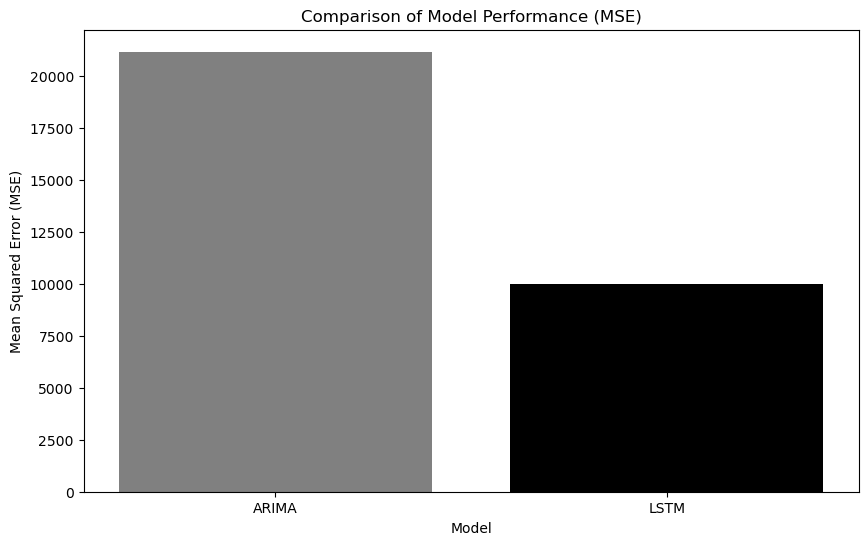

,Model,MSE
0,ARIMA,21157.400717
1,LSTM,10008.056328


In [28]:
# Only ploting MSE of two models. # Reference: Assignment 1a
model_names = ['ARIMA', 'LSTM']
model_mse = [arima_mse, lstm_mse]

# Creating a bar chart for visual comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_mse, color=['Gray', 'black'])

plt.title('Comparison of Model Performance (MSE)')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

# Presenting the results in a table format
mse_table = pd.DataFrame({
    'Model': model_names,
    'MSE': model_mse
})

mse_table

From the above analysis, we can see that ARIMA model has more MSE than LSTM. Therefore, we can summarise LSTM model as a better fit for the analysis.

### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results


##### Result Summary from Assignment 1a:
* Linear Regression: MSE = 8765.593976
* Random Forest Regressor: MSE = 4401.029216
* Gradient Boosting Regressor: MSE = 7775.052488

I will re-calculate `lr_mse`, `rf_mse`, and `gb_mse` since we have used MinMaxScaler for scaling in this assignment.

In [29]:
# Code form Assignment 1a
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Initialize the models
lr_model = LinearRegression() #Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
rf_model = RandomForestRegressor(random_state=42) #Reference https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
gb_model = GradientBoostingRegressor(random_state=42) #Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

# Fit the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
 
# Predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Evaluate the models
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f'Linear Regression Mean Squared Error: {lr_mse}\nRandom Forest Mean Squared Error: {rf_mse}\nGradient Boosting Regressor Mean Squared Error: {gb_mse}')


Linear Regression Mean Squared Error: 8547.073908290506
Random Forest Mean Squared Error: 3976.6649632632384
Gradient Boosting Regressor Mean Squared Error: 7487.851802788284


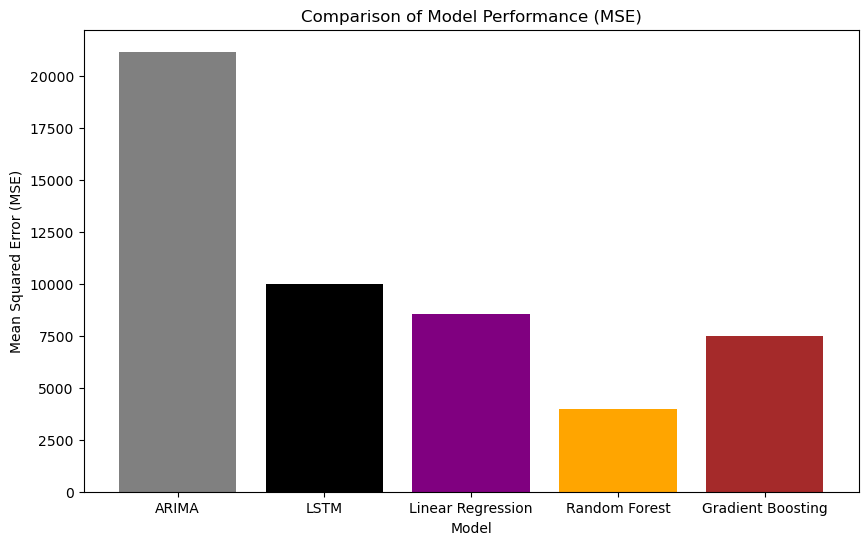

,Model,MSE
0,ARIMA,21157.400717
1,LSTM,10008.056328
2,Linear Regression,8547.073908
3,Random Forest,3976.664963
4,Gradient Boosting,7487.851803


In [30]:
# Only ploting MSE of all models from assignment 1a and 1b.
model_names = ['ARIMA', 'LSTM', 'Linear Regression', 'Random Forest', 'Gradient Boosting']
model_mse = [arima_mse, lstm_mse, lr_mse, rf_mse, gb_mse]
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_mse, color=['Gray', 'black', 'purple', 'orange', 'brown'])

plt.title('Comparison of Model Performance (MSE)')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

# Presenting the results in a table format
mse_table = pd.DataFrame({
    'Model': model_names,
    'MSE': model_mse
})

mse_table

#### Summary:
From the above comparison, we can clearly see that, random forest regressor outperforms all other models as it has the lowest mean squared error (MSE). Therefore, random forest model would be the best fit.

### 6. Reflect on what you have learned by completing this assignment and how to improve the models

Throughout the assignment 1a and 1b I have learned about different models and how to implement them. This enhanced my research and coding skills. I re-calculated the MSE values from three moldes of assignment 1a with MinMaxScaler and found even better output for all three models. 

By completing this assignment I now understand that how important data processing and visualisation is. I learned about how to make the data stationary, importance of decomposition, removing seasonality, trends and outliers to fit the data for ARIMA. 

Using `daily_data` for our models could have given a better visualisation. However, to maintain the same scale of MSE as assignment 1a I selected original dataframe.

As I am learning these models for the first time, I believe exploring seasonal model like SARIMA could capture seasonal effects more effectively.

### 7. References

Lecture

Workshop

Assignment 1a

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html

https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html

https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.forecast.html
